# Optimization Demo
Many courses about data science claim that they can teach it without calculus. Then they spend the next hour talking about calculus concepts. I hope, I found a better way to show these concepts. For simplicity, everything was done in Python.  

Here I made a script that tries to approximate the image by semi-randomly placing black and white lines. It can be useful to show how "small steps" converge into the original image. 

In [6]:
import numpy as np
from PIL import Image, ImageDraw
from random import random
from matplotlib import cm
from tqdm import tqdm
from random import randint
import math

Downloading and showing inpute image. It is better to use black and white pictures, they converge better.

In [7]:
Source_image_dir = r'nike_logo.jpg'
with Image.open(Source_image_dir).convert('RGB') as img:
    Target_image = np.array(img)

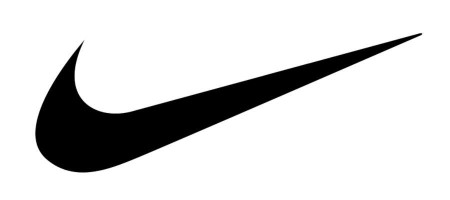

In [8]:
Image.fromarray(np.uint8(Target_image))

In [9]:
result_image = Image.new('RGB', (Target_image.shape[1], Target_image.shape[0]))
image_wight, image_height = Target_image.shape[1], Target_image.shape[0]
image_wight, image_height

(450, 200)

Here is a image wher changes would be applied.

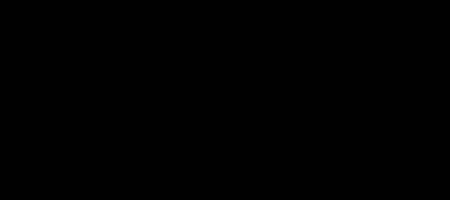

In [10]:
result_image

For simplicity, I used sqare loss.

In [11]:
np.sum( (Target_image - result_image)**2 )

952923

Main function which randomly places lines.

In [12]:
def draw_random_line(result_image,image_wight, image_height):
    tmp_image = result_image.copy()
    tmp_draw = ImageDraw.Draw(tmp_image)
    line_start_x, line_start_y = image_wight * random(), image_height*random()
    
    angle = 2*math.pi*random()
    
    line_end_x, line_end_y = line_start_x + 100*math.cos(angle), line_start_y + 100*math.sin(angle)
    if random() > 0.5:
        tmp_draw.line([ (line_start_x, line_start_y), (line_end_x, line_end_y) ],
                      fill=(255,255,255), width= int(5*random()))
    else:
        tmp_draw.line([ (line_start_x, line_start_y), (line_end_x, line_end_y) ],
                      fill=(0,0,0), width= int(5*random()))
    return tmp_draw._image

Main optimization script.

In [14]:
iterations_number = 25000

result_image = Image.new('RGB', (Target_image.shape[1], Target_image.shape[0]))
image_wight, image_height = Target_image.shape[1], Target_image.shape[0]

current_loss = np.sum( (Target_image - np.array(result_image))**2 )

number_of_lines = 0

for i in tqdm(range(iterations_number)):

    tmp_image = draw_random_line(result_image, image_wight, image_height)
    tmp_loss = np.sum( (Target_image - tmp_image)**2 )
    if (tmp_loss < current_loss):
        current_loss = tmp_loss
        result_image = tmp_image
        number_of_lines += 1
print(number_of_lines)

100%|███████████████████████████████████████████████████████████████████████████| 25000/25000 [00:30<00:00, 824.30it/s]

3956


And here is a result.

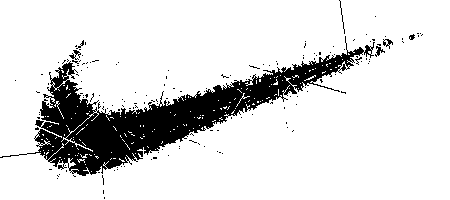

In [15]:
result_image

## Creating demo of the process
Check a project folder for video

In [24]:
import os
import shutil
import cv2 as cv

iterations_number = 20000
out = cv.VideoWriter('project.avi',cv.VideoWriter_fourcc(*'DIVX'), 30, (Target_image.shape[1], Target_image.shape[0]))


result_image = Image.new('RGB', (Target_image.shape[1], Target_image.shape[0]))
image_wight, image_height = Target_image.shape[1], Target_image.shape[0]

current_loss = np.sum( (Target_image - np.array(result_image))**2 )

number_of_lines = 0

for i in tqdm(range(iterations_number)):
    if (i % 50 == 0) or (i < 150):
        #filename = 'img_'+'0'*(9 - len(str(i))) + str(i) + '.jpg'
        result_image.save('tmp.png')
        out.write(cv.imread('tmp.png'))
        
    tmp_image = draw_random_line(result_image, image_wight, image_height)
    tmp_loss = np.sum( (Target_image - tmp_image)**2 )
    if (tmp_loss < current_loss):
        current_loss = tmp_loss
        result_image = tmp_image
        number_of_lines += 1
out.release()

100%|███████████████████████████████████████████████████████████████████████████| 20000/20000 [00:30<00:00, 666.27it/s]
